In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import csv

Cargamos el grafo de Puerto Montt

In [47]:
north = -41.4
south = -41.496
east = -72.8
west = -73.03

PM = ox.graph_from_bbox(north,south,east,west,network_type='drive')

/var/folders/93/mfrc9gzx0rb9ytmw0dwrlgzh0000gn/T/ipykernel_6719/2698006118.py:6: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  PM = ox.graph_from_bbox(north,south,east,west,network_type='drive')
/var/folders/93/mfrc9gzx0rb9ytmw0dwrlgzh0000gn/T/ipykernel_6719/2698006118.py:6: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  PM = ox.graph_from_bbox(north,south,east,west,network_type='drive')


Como vimos también en el trabajo 1, existen arcos paralelos en los grafos ofrecidos por la liberería, para simplificar el problema los eliminamos

In [48]:
duplicados = []

for u,v,a in PM.edges(data = True):
  if len(PM[u][v]) == 2:
    duplicados.append((u,v,1))
  elif len(PM[u][v]) == 3:
    duplicados.append((u,v,1))
    duplicados.append((u,v,2))


duplicados = list(dict.fromkeys(duplicados))
PM.remove_edges_from(duplicados)

In [49]:
def setear(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Omitir el encabezado, si existe
        coordenadas = [tuple(map(float, row[1:3])) for row in reader]
    return coordenadas

In [72]:
coordenadas_plantas = setear('datos/ubicacion_produccion.csv')
coordenadas_almacenes = setear('datos/ubicacion_demanda.csv')
coordenadas_bodegas = setear('datos/ubicacion_bodegas_adicionales.csv')

print (coordenadas_plantas)
print(coordenadas_almacenes)
print(coordenadas_bodegas)

[(-72.9049847, -41.4382097), (-72.89773, -41.4616118), (-73.0018052, -41.4748112), (-72.9806647, -41.4723745), (-72.9569328, -41.4269752), (-72.886137, -41.4280949), (-72.9125495, -41.4548131)]
[(-72.9180463, -41.4723684), (-72.9469427, -41.4568804), (-72.9942386, -41.4478807), (-72.9723534, -41.4658041), (-72.9047511, -41.4556736), (-72.989895, -41.478831), (-72.9365376, -41.465138), (-72.9793107, -41.470842), (-72.9192027, -41.4598745), (-72.9708642, -41.4873284), (-72.9229513, -41.4737758), (-72.9237241, -41.4616888), (-72.9144487, -41.4744047), (-72.9690185, -41.4795911), (-72.9703678, -41.4669273), (-72.9420883, -41.4560195), (-72.9723474, -41.4671811), (-72.9100943, -41.4596985), (-72.9988203, -41.4658013), (-72.9911929, -41.4441747), (-72.9113151, -41.4222032), (-72.9172653, -41.4616971), (-72.9911983, -41.4790814), (-72.9037715, -41.4110034)]
[(-72.995677, -41.4626411), (-72.9575967, -41.4735434), (-72.9709703, -41.46606), (-72.9214348, -41.4473181), (-72.9017258, -41.4044988),

Dado que las coordenadas no necesariamente coinciden con un nodo del grafo de puerto montt, lo asignaremos a su nodo más cercano. Con la función definida a continuación:

In [75]:
def buscar_nodo(grafo, lista_coords):
    nodos = []
    for ubicacion in lista_coords:
        x = ubicacion[0]
        y = ubicacion[1]
        print(f"Buscando nodo cercano para la coordenada: x = {x}, y = {y}")
        nodo_cercano = ox.nearest_nodes(grafo, x, y)
        nodos.append(nodo_cercano)
    return nodos


In [76]:
nodos_plantas = buscar_nodo(PM, coordenadas_plantas)
nodos_almacenes = buscar_nodo(PM, coordenadas_almacenes)
nodos_bodegas = buscar_nodo(PM, coordenadas_bodegas)

print("Nodos plantas:", nodos_plantas)
print("Nodos almacenes:", nodos_almacenes)
print("Nodos bodegas:", nodos_bodegas)


Buscando nodo cercano para la coordenada: x = -72.9049847, y = -41.4382097
Buscando nodo cercano para la coordenada: x = -72.89773, y = -41.4616118
Buscando nodo cercano para la coordenada: x = -73.0018052, y = -41.4748112
Buscando nodo cercano para la coordenada: x = -72.9806647, y = -41.4723745
Buscando nodo cercano para la coordenada: x = -72.9569328, y = -41.4269752
Buscando nodo cercano para la coordenada: x = -72.886137, y = -41.4280949
Buscando nodo cercano para la coordenada: x = -72.9125495, y = -41.4548131
Buscando nodo cercano para la coordenada: x = -72.9180463, y = -41.4723684
Buscando nodo cercano para la coordenada: x = -72.9469427, y = -41.4568804
Buscando nodo cercano para la coordenada: x = -72.9942386, y = -41.4478807
Buscando nodo cercano para la coordenada: x = -72.9723534, y = -41.4658041
Buscando nodo cercano para la coordenada: x = -72.9047511, y = -41.4556736
Buscando nodo cercano para la coordenada: x = -72.989895, y = -41.478831
Buscando nodo cercano para la 

Le ponemos nombres a los nodos

In [53]:
plantas = []

for i in range(len(nodos_plantas)):
  plantas.append('planta' + str(i+1))


almacenes = []

for i in range(len(nodos_almacenes)):
  almacenes.append('almacén' + str(i+1))


bodegas = []

for i in range(len(nodos_bodegas)):
  bodegas.append('bodega' + str(i+1))



print(plantas)

['planta1', 'planta2', 'planta3', 'planta4', 'planta5', 'planta6', 'planta7']


In [81]:
for node_id, nuevo_nombre in zip(nodos_plantas, plantas):
    if node_id in PM.nodes:
        PM.nodes[node_id]['name'] = nuevo_nombre
    else:
        print(f"Nodo {node_id} de planta no encontrado en el grafo")

for node_id, nuevo_nombre in zip(nodos_almacenes, almacenes):
    if node_id in PM.nodes:
        PM.nodes[node_id]['name'] = nuevo_nombre
    else:
        print(f"Nodo {node_id} de almacén no encontrado en el grafo")

for node_id, nuevo_nombre in zip(nodos_bodegas, bodegas):
    if node_id in PM.nodes:
        PM.nodes[node_id]['name'] = nuevo_nombre
    else:
        print(f"Nodo {node_id} de bodega no encontrado en el grafo")


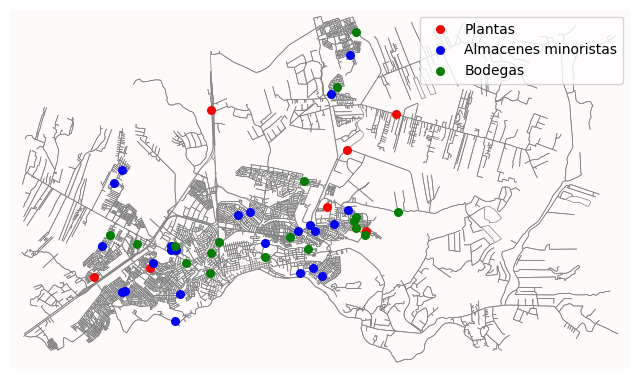

In [83]:
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(PM, node_size=0, edge_color="gray", edge_linewidth=0.5, bgcolor = 'snow', close=False, show=False)


ax.scatter([PM.nodes[node]['x'] for node in nodos_plantas],
           [PM.nodes[node]['y'] for node in nodos_plantas],
           c='red', s=30, label="Plantas")

ax.scatter([PM.nodes[node]['x'] for node in nodos_almacenes],
           [PM.nodes[node]['y'] for node in nodos_almacenes],
           c='blue', s=30, label="Almacenes minoristas")

ax.scatter([PM.nodes[node]['x'] for node in nodos_bodegas],
           [PM.nodes[node]['y'] for node in nodos_bodegas],
           c='green', s=30, label="Bodegas")

plt.legend(loc="upper right")
plt.show()

# Parte 1:

Usaremos una cantidad fija de bodegas adicionales = 3. Arbirtrariamente, definimos que serán las 3 primeras de la lista

In [84]:
G = nx.DiGraph()

In [85]:
costos_tte = {}

for origen in nodos_plantas + nodos_almacenes + nodos_bodegas:
    nombre_origen = PM.nodes[origen]['name']
    costos_tte[nombre_origen] = {}
    
    for destino in nodos_plantas + nodos_almacenes + nodos_bodegas:
        nombre_destino = PM.nodes[destino]['name']
        
        #evitar errores, no calculemos la distancia si es el mismo nodo
        if origen != destino and (
            (origen in nodos_plantas and destino in nodos_almacenes) or 
            (origen in nodos_almacenes and destino in nodos_plantas) or
            (origen in (nodos_plantas + nodos_almacenes) and destino in nodos_bodegas) or
            (origen in nodos_bodegas and destino in (nodos_plantas + nodos_almacenes))
        ):
            #distancia sacada del taller
            distancia = nx.shortest_path_length(PM, source=origen, target=destino, weight='length')
            costo = round((distancia / 1000) * 12, 1) # La distancia está en metros por eso hay que dividir x 1000
            
    
            costos_tte[nombre_origen][nombre_destino] = costo
            
            print(f"Distancia entre {nombre_origen} y {nombre_destino}: {distancia} metros (Costo: {costo})")


Distancia entre planta1 y almacén1: 5457.316000000002 metros (Costo: 65.5)
Distancia entre planta1 y almacén2: 6284.3070000000025 metros (Costo: 75.4)
Distancia entre planta1 y almacén3: 12306.876999999997 metros (Costo: 147.7)
Distancia entre planta1 y almacén4: 8981.817 metros (Costo: 107.8)
Distancia entre planta1 y almacén5: 3083.258 metros (Costo: 37.0)
Distancia entre planta1 y almacén6: 10665.731999999996 metros (Costo: 128.0)
Distancia entre planta1 y almacén7: 5496.628 metros (Costo: 66.0)
Distancia entre planta1 y almacén8: 9477.265 metros (Costo: 113.7)
Distancia entre planta1 y almacén9: 4454.991000000001 metros (Costo: 53.5)
Distancia entre planta1 y almacén10: 9973.375 metros (Costo: 119.7)
Distancia entre planta1 y almacén11: 6064.968000000001 metros (Costo: 72.8)
Distancia entre planta1 y almacén12: 4193.214 metros (Costo: 50.3)
Distancia entre planta1 y almacén13: 5528.698 metros (Costo: 66.3)
Distancia entre planta1 y almacén14: 9063.480000000001 metros (Costo: 108.8)

Definimos una función para leer csv

In [19]:
import csv

def abrir_archivos(ruta):
    dicc = {}

    with open(ruta, 'r') as archivo:
        lector_csv = csv.reader(archivo)
        encabezados = next(lector_csv)[1:]  # Leer encabezados y omitir el primer elemento (ID)
        encabezados = [encabezado.strip() for encabezado in encabezados]  # Limpiar espacios en encabezados

        print("Encabezados:", encabezados)  # Imprimir encabezados para verificar que se leen correctamente

        for fila in lector_csv:
            print("Fila leída:", fila)  # Imprimir cada fila para verificar que se leen correctamente
            if fila:  # Verificar que la fila no esté vacía
                clave = int(fila[0].strip())  # Convertir el primer elemento a entero (ID)
                datos = [int(valor.strip()) for valor in fila[1:]]  # Convertir los demás elementos a enteros

                # Asociar los datos a los encabezados para crear un diccionario por tienda
                dicc[clave] = dict(zip(encabezados, datos))

    print("Diccionario final:", dicc)  # Imprimir el diccionario final para verificar el resultado
    return dicc



In [20]:
ruta1 = "datos/demanda_min.csv"
ruta2 = "datos/demanda_max.csv"

ddas_min = abrir_archivos(ruta1)
ddas_max = abrir_archivos(ruta2)

Encabezados: ['1', '2', '3', '4', '5', '6', '7', '8']
Fila leída: ['1', '0', '0', '188', '0', '0', '987', '248', '0']
Fila leída: ['2', '6', '63', '202', '280', '53', '1200', '348', '48']
Fila leída: ['3', '4', '63', '191', '0', '0', '1100', '349', '0']
Fila leída: ['4', '0', '0', '187', '0', '0', '1114', '248', '0']
Fila leída: ['5', '0', '63', '91', '81', '0', '1255', '241', '0']
Fila leída: ['6', '99', '300', '300', '203', '0', '1289', '255', '0']
Fila leída: ['7', '203', '302', '303', '309', '0', '1200', '248', '0']
Fila leída: ['8', '0', '63', '404', '0', '0', '1200', '248', '0']
Fila leída: ['9', '0', '0', '91', '78', '0', '1211', '349', '0']
Fila leída: ['10', '0', '0', '90', '0', '0', '1102', '248', '0']
Fila leída: ['11', '0', '67', '191', '0', '0', '1213', '236', '0']
Fila leída: ['12', '1', '68', '89', '81', '0', '1107', '248', '0']
Fila leída: ['13', '0', '63', '191', '82', '0', '1197', '245', '0']
Fila leída: ['14', '0', '0', '89', '0', '0', '800', '248', '0']
Fila leída: 

In [21]:
print(ddas_max)

{1: {'1': 204, '2': 367, '3': 488, '4': 280, '5': 150, '6': 1387, '7': 648, '8': 148}, 2: {'1': 406, '2': 363, '3': 502, '4': 480, '5': 453, '6': 1600, '7': 648, '8': 248}, 3: {'1': 304, '2': 363, '3': 391, '4': 289, '5': 255, '6': 1400, '7': 649, '8': 148}, 4: {'1': 304, '2': 367, '3': 487, '4': 277, '5': 154, '6': 1414, '7': 648, '8': 255}, 5: {'1': 205, '2': 263, '3': 491, '4': 381, '5': 156, '6': 1455, '7': 541, '8': 148}, 6: {'1': 499, '2': 600, '3': 600, '4': 503, '5': 246, '6': 1589, '7': 555, '8': 249}, 7: {'1': 503, '2': 602, '3': 703, '4': 609, '5': 255, '6': 1500, '7': 648, '8': 148}, 8: {'1': 304, '2': 263, '3': 604, '4': 381, '5': 254, '6': 1500, '7': 548, '8': 280}, 9: {'1': 204, '2': 379, '3': 391, '4': 278, '5': 154, '6': 1511, '7': 649, '8': 148}, 10: {'1': 305, '2': 263, '3': 490, '4': 283, '5': 246, '6': 1502, '7': 548, '8': 248}, 11: {'1': 304, '2': 267, '3': 391, '4': 281, '5': 255, '6': 1513, '7': 536, '8': 251}, 12: {'1': 201, '2': 368, '3': 389, '4': 281, '5': 2

In [22]:
#se agregan los nodos correspondientes a las tiendas

generaciones = 0
atracciones = 0

for i in range(1, 26):
  for j in range(1, 9):
    nombre_nodo = 'tienda' + str(i) + 't' + str(j)
    demanda = int(ddas_max[i][str(j)] - ddas_min[i][str(j)])
    atracciones += demanda
    G1.add_node(nombre_nodo, demand = demanda)

KeyError: 1